# How often does a Twitter account use certain terms?
This Python script collects as many Tweets as possible ([3 200 Tweets in most cases](https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline)) of an account and calculates how many Tweets in a timeperiod (default is per week) contained a list of terms. Similar to Google Ngram Viewer. 

## Quickstart
1. [Create a Twitter App](https://apps.twitter.com/)
2. Generate Tokens in the 'Keys and Access Tokens'-Tab
3. Copy Consumer Key, Consumer Token, Access Token and Access Token Secret to cell below
4. Use the function `collect_n_draw('SCREENNAME', ['TERM1', 'TERM2', 'TERM3'])` to plot the data

## Recommended Use
Don't use `collect_n_draw` as it collects the tweets every time which takes way too long.
1. Use `tweets = tweets_as_df('SCREENNAME)` to collect the tweets **once**
2. Use `wordfreq(tweets, ['TERM1', 'TERM2'])` as often as you want
3. `wordfreq` returns a dataframe with the Tweets it found for further examination

## Advanced Use
Per default `wordfreq(tweets, ['TERM1', 'TERM2'])` shows the proportion per week. You can change it to per day or per month by adding a timeperiod:
* per day: `wordfreq(tweets, ['TERM1', 'TERM2'], 'D')` 
* per month: `wordfreq(tweets, ['TERM1', 'TERM2'], 'M')`

In [1]:
from TwitterAPI import TwitterAPI, TwitterPager
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

def tweets_as_df(screen_name):
    tweets = []
    r = TwitterPager(api, 'statuses/user_timeline', {'screen_name': screen_name, 'count':200, 'trim_user':'true', 'tweet_mode':'extended'})
    for item in r.get_iterator(wait=0):
        if 'full_text' in item:
            #print (item['full_text'])
            tweets.append(item)
        elif 'message' in item and item['code'] == 88:
            print ('SUSPEND, RATE LIMIT EXCEEDED: %s\n' % item['message'])
            break
    df = pd.DataFrame(tweets)
    df.drop_duplicates(subset='id', keep=False, inplace=True)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df.set_index('created_at', inplace=True)
    return df

def wordfreq(df_local, termlist, timeperiod='W'):
    df_local['tweet'] = 1
    df_month = df_local.groupby(pd.Grouper(freq=timeperiod))['tweet'].sum()
    fig = plt.figure(figsize=(15, 8),facecolor='1')
    df_freq = df_local[df_local['full_text'].str.contains(termlist[0], case=False)]
    df_percent = df_freq.groupby(pd.Grouper(freq=timeperiod))['tweet'].sum() / df_month
    ax = df_percent.plot(title='Amount of tweets containing these terms')
        
    for word in termlist:
        if word == termlist[0]:
            pass
        else:
            df_freq2 = df_local[df_local['full_text'].str.contains(word, case=False)]
            df_percent2 = df_freq2.groupby(pd.Grouper(freq=timeperiod))['tweet'].sum() / df_month 
            if timeperiod == 'D':
                df_percent2.index.name = 'Day'
            elif timeperiod == 'W':
                df_percent2.index.name = 'Week'
            elif timeperiod == 'M':
                df_percent2.index.name = 'Month'
            df_percent2.plot(ax=ax)
            df_freq = pd.concat([df_freq, df_freq2])
            df_freq.drop_duplicates(subset='id',inplace=True)
    plt.legend(termlist) 
    return(df_freq)

def collect_n_draw(screen_name, termlist):
    useless = wordfreq(tweets_as_df(screen_name), termlist)

In [2]:
consumer_key = 'CHANGETHIS'
consumer_secret = 'CHANGETHIS'
access_token = 'CHANGETHIS'
access_token_secret = 'CHANGETHIS'
api = TwitterAPI(consumer_key,consumer_secret,access_token,access_token_secret)

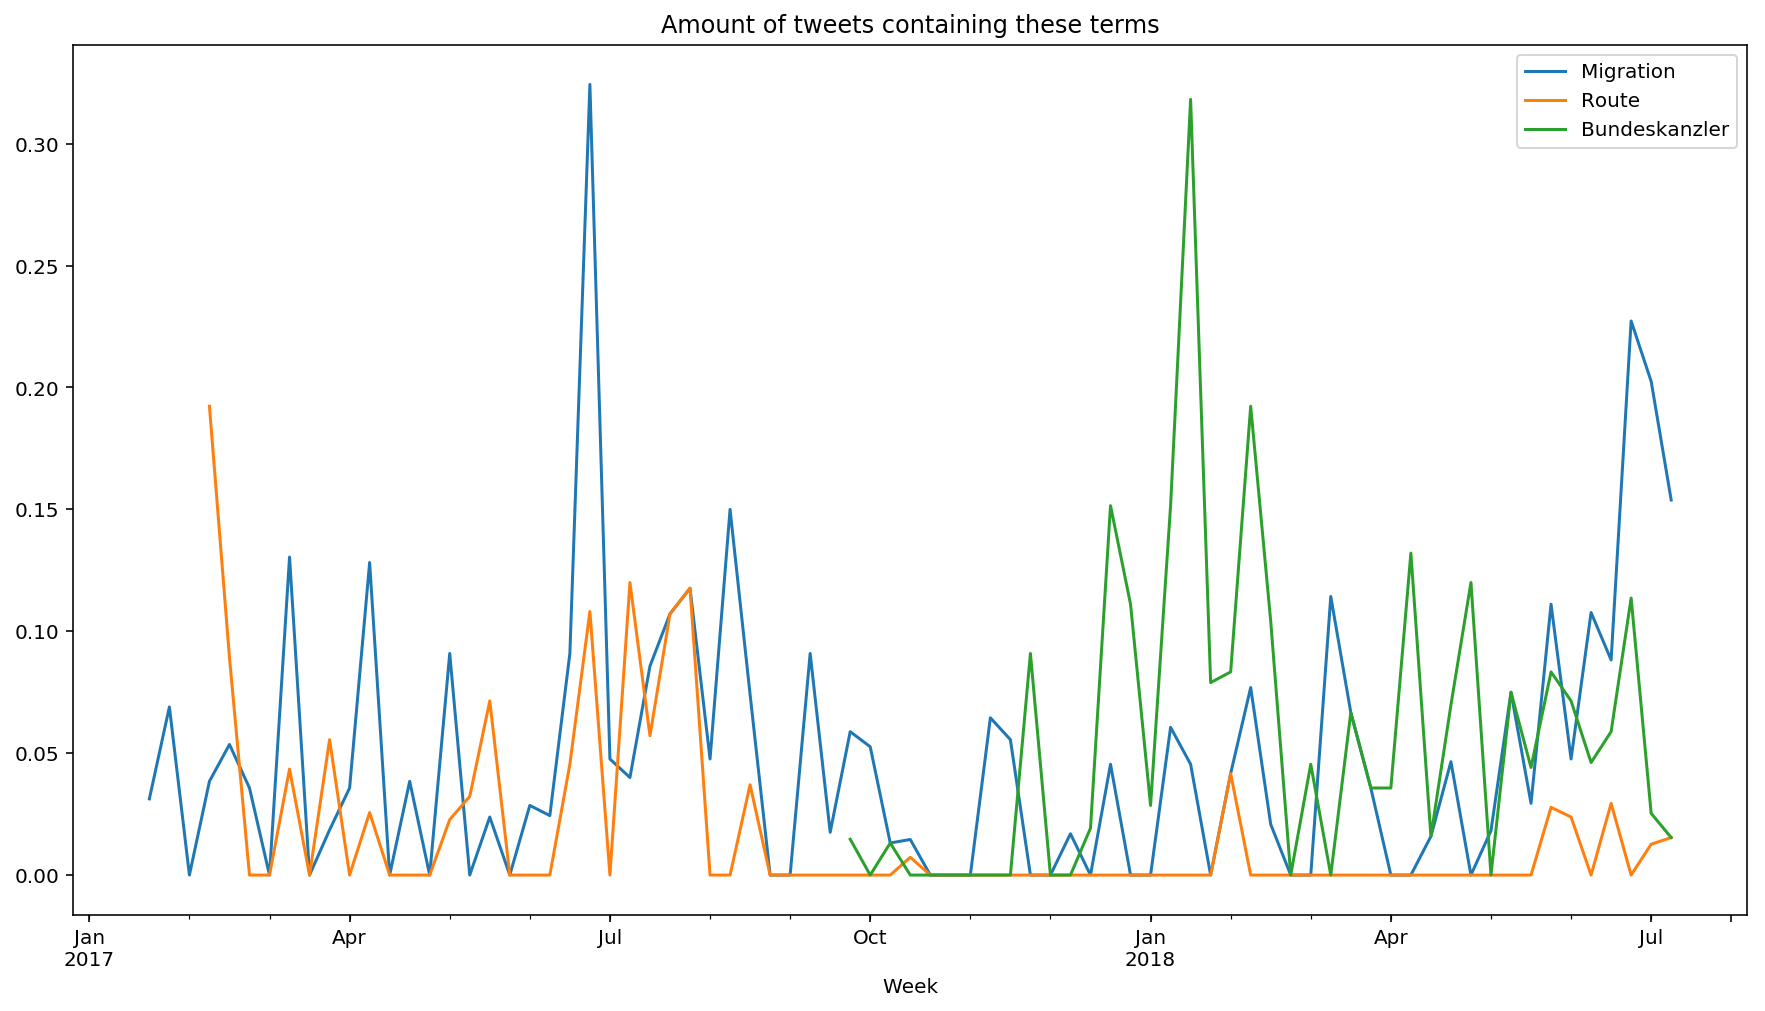

In [3]:
# Quick'n'dirty
collect_n_draw('sebastiankurz', ['Migration', 'Route', 'Bundeskanzler'])

In [5]:
# Recommended Usage
# Run this once
tweets = tweets_as_df('sebastiankurz')

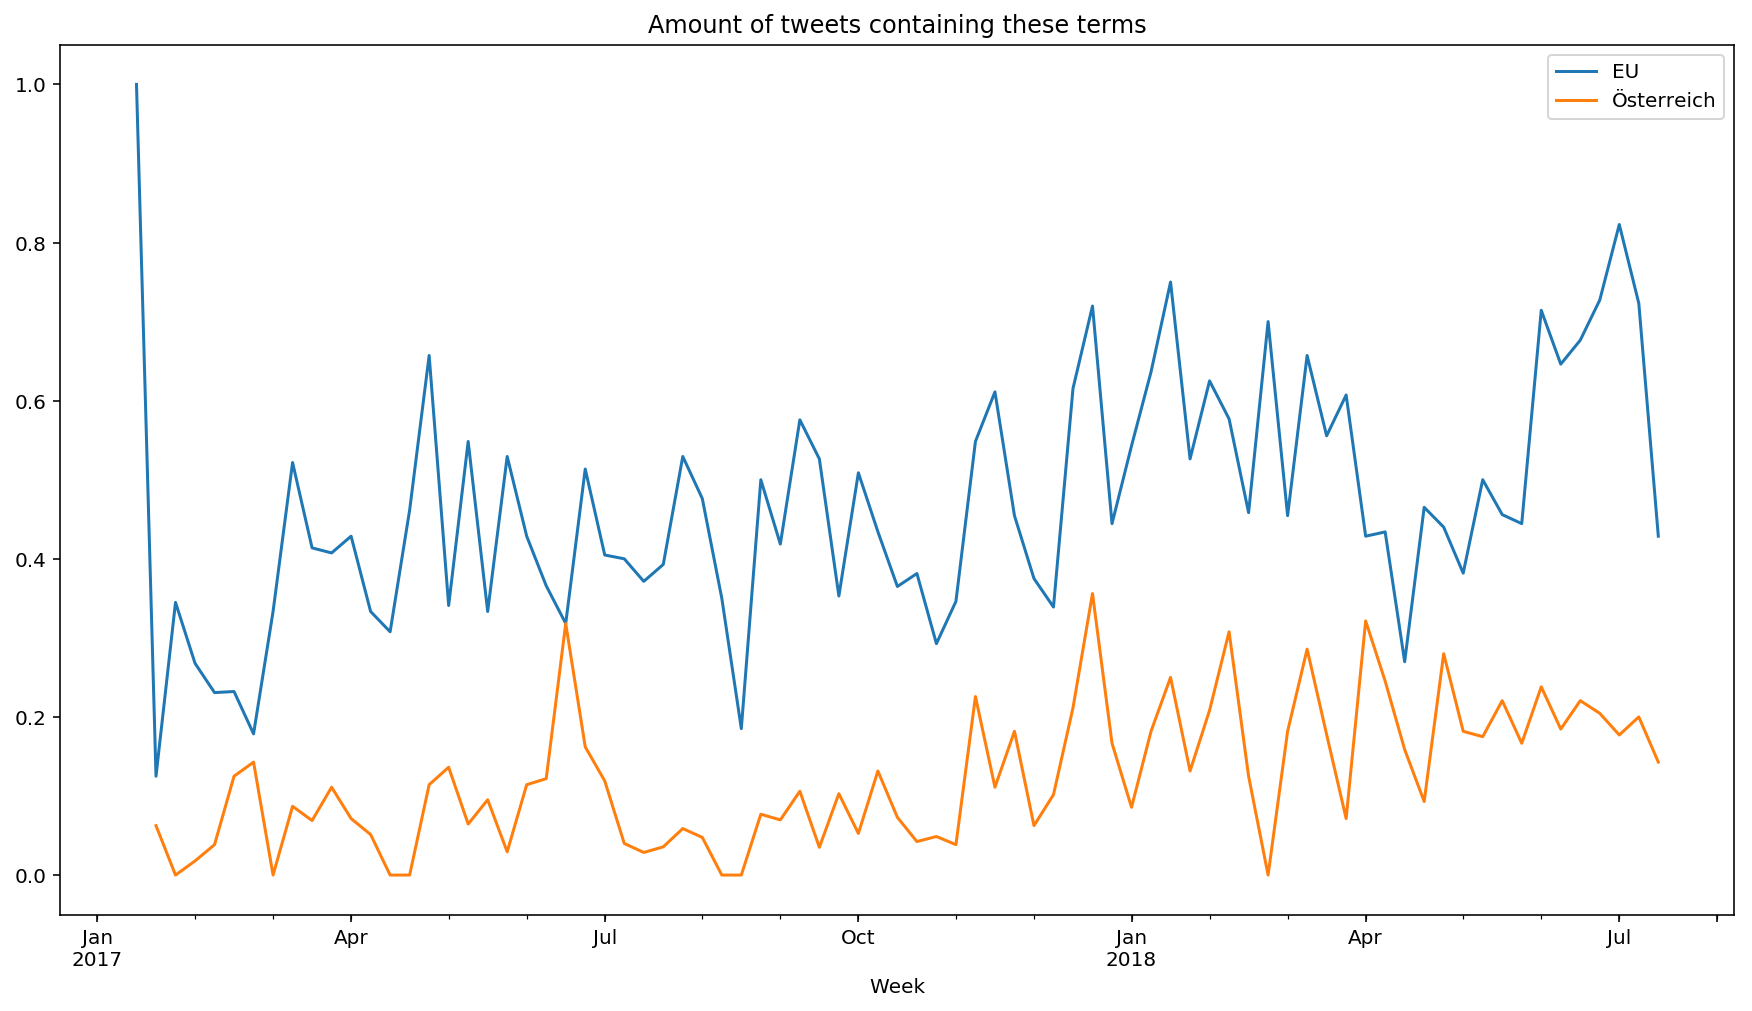

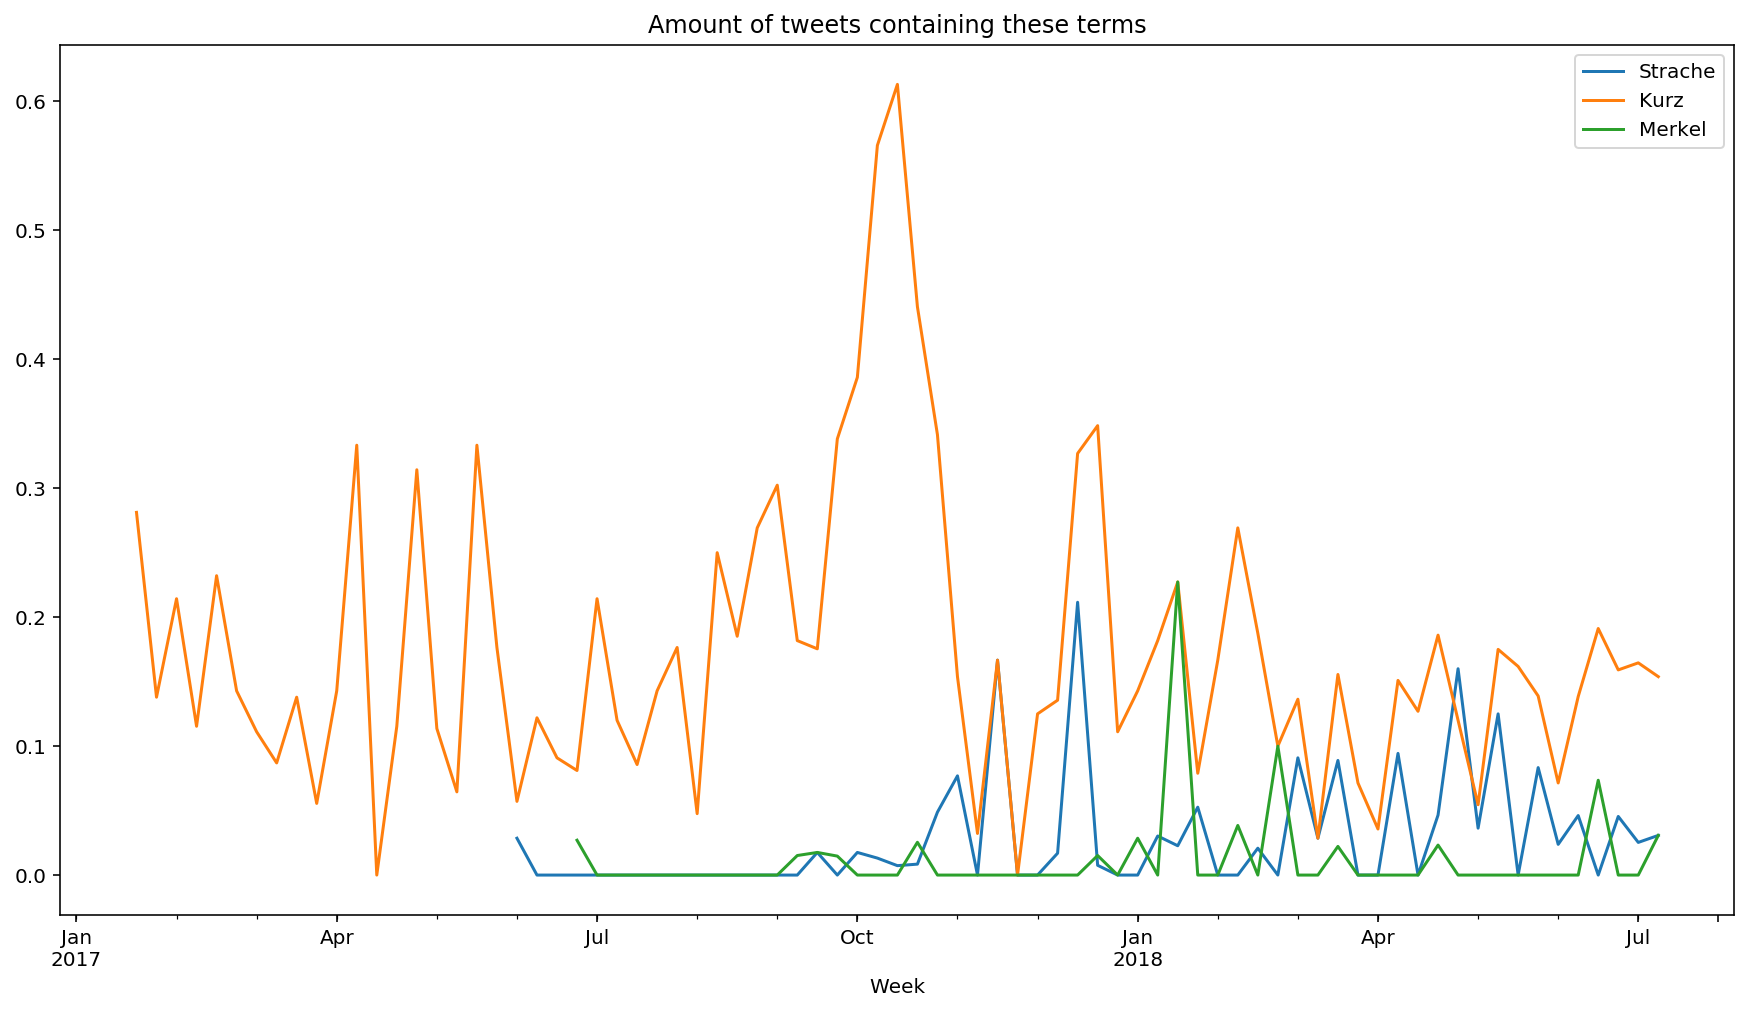

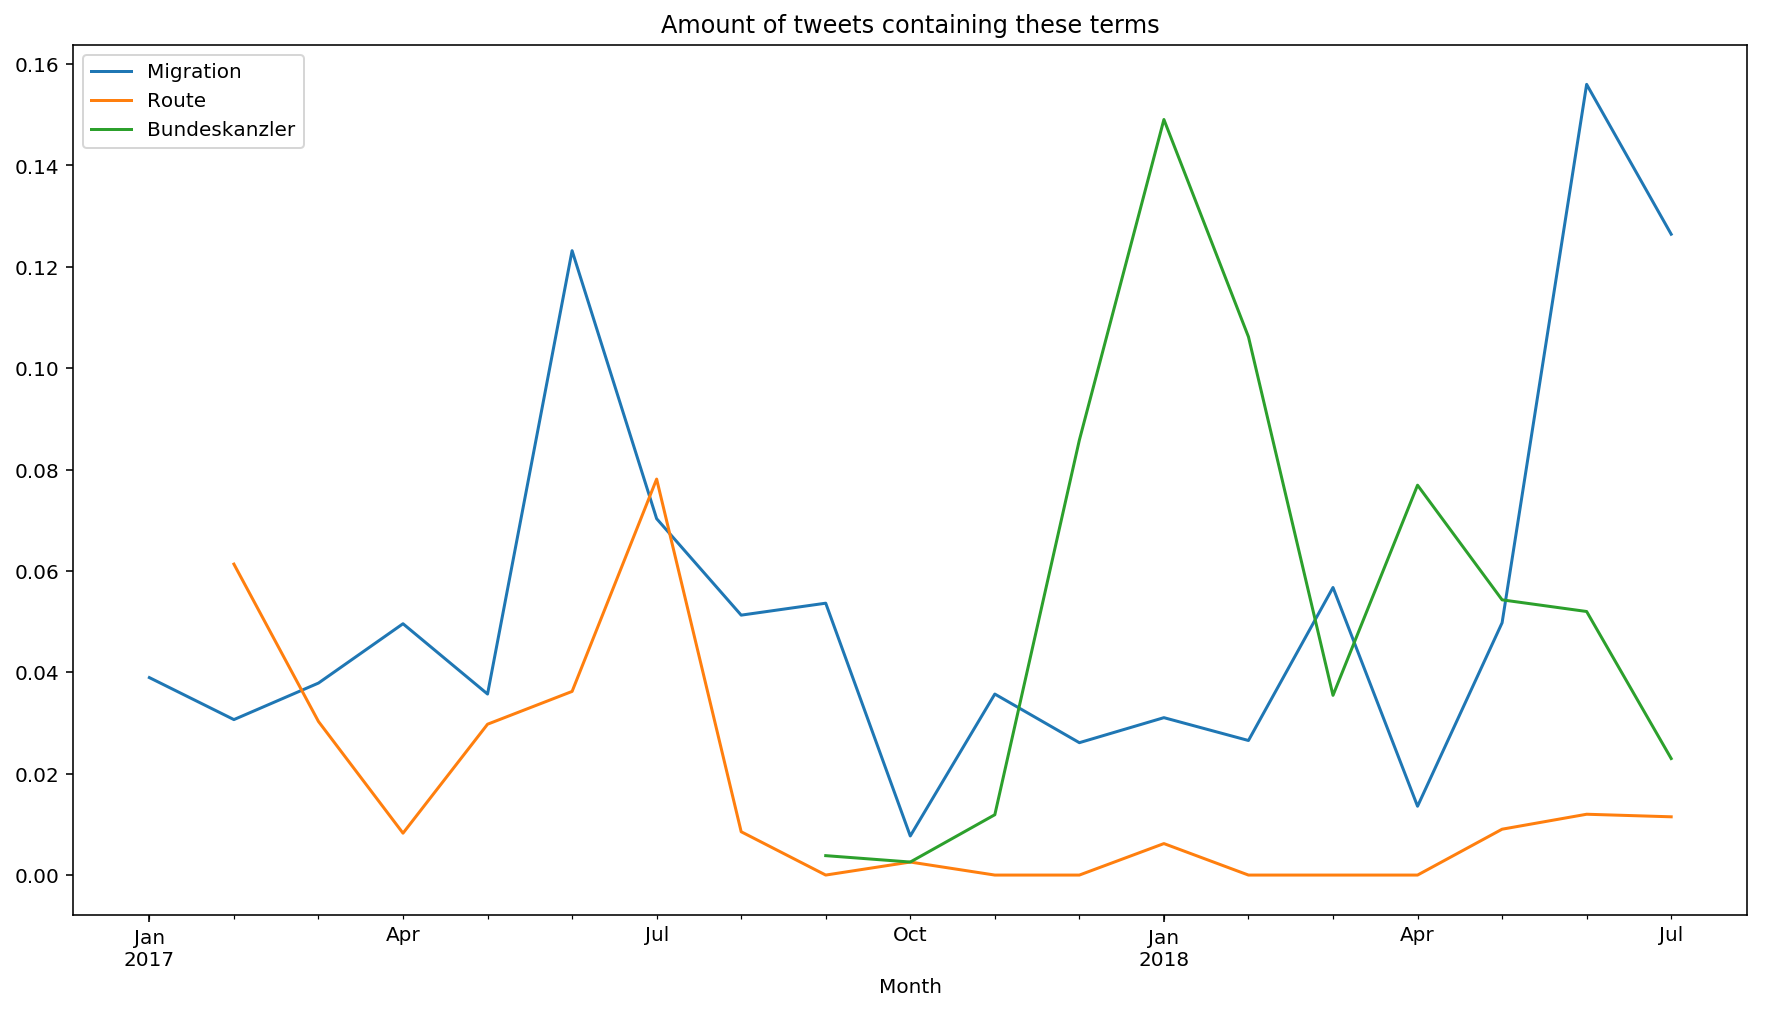

In [6]:
# Run this as often as you want
results = wordfreq(tweets, ['EU', 'Österreich'])
results = wordfreq(tweets, ['Strache', 'Kurz', 'Merkel'])

results = wordfreq(tweets, ['Migration', 'Route', 'Bundeskanzler'], 'M')

In [ ]:
# Examine the Tweets
results